## Contrato Spot

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Load the 'Contrato regular' data
file_path_spot = 'contrato_spot.csv'
contrato_spot_df = pd.read_csv(file_path_spot)

# Define the columns to use for training
features = ['Nº Material', 'Lbmo Material', 'Total Factura', 'Costo Total', 'margen Venta']
target = 'Base Fixed'

# Handle missing values (if any)
contrato_spot_df = contrato_spot_df.dropna(subset=features + [target])
# contrato_spot_df.head()

In [2]:
# Normalize the feature values between 0 and 1
scaler = MinMaxScaler()
contrato_spot_df[['Lbmo Material', 'Total Factura', 'Costo Total', 'margen Venta']] = scaler.fit_transform(contrato_spot_df[['Lbmo Material', 'Total Factura', 'Costo Total', 'margen Venta']])


X_spot = contrato_spot_df[['Nº Material', 'Lbmo Material', 'Total Factura', 'Costo Total', 'margen Venta']]
y_spot = contrato_spot_df[[target]]

In [3]:
unique_materials = X_spot['Nº Material'].unique()
unique_materials

array([2020, 1000, 2010, 2000, 2130, 2070, 2210])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_spot, y_spot, test_size=0.2, random_state=42)

spot_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [5]:
spot_model.fit(X_train, y_train)

f:\Hassan\sales_price\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [8]:
y_pred = spot_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R2:', r2)
print('MSE:', rmse)
print('MAE:', mae)

R2: 0.8376229366295352
MSE: 3332.6870978841425
MAE: 8.250114729521494


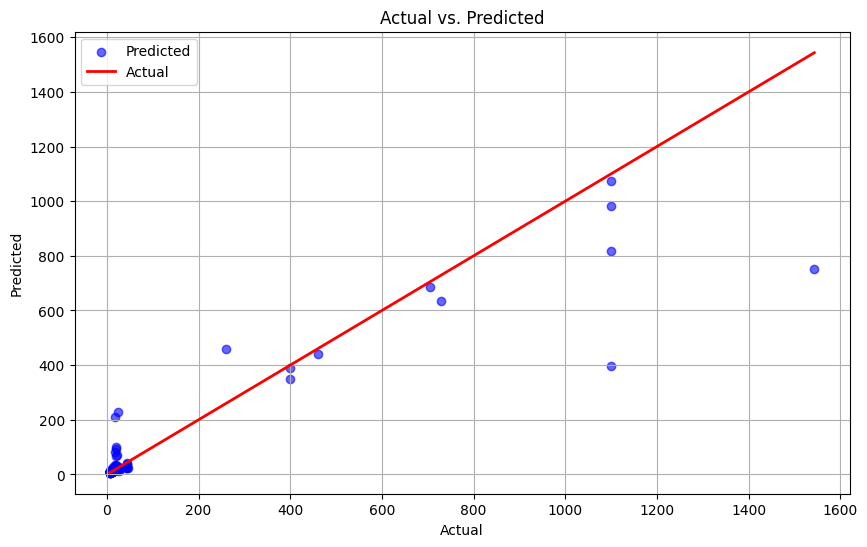

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted', alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', lw=2, label='Actual')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
# Save the Model and fitted scaler

import pickle
model_and_scaler = {'model':spot_model, 
                    'scaler':scaler}
with open('Spot_Model_and_scaler.pkl', 'wb') as f:
    pickle.dump(model_and_scaler, f)

In [10]:
# Prediction Fucntion

def predict(N_material, Lbmo_material, Total_Factura, Costo_Total, margen_venta, model=spot_model):
    if N_material not in [2020, 1000, 2010, 2000, 2130, 2070, 2210]:
        raise ValueError("Error: The chosen 'Nº Material' is not recognized by the model.")
    
    features = np.array([Lbmo_material, Total_Factura, Costo_Total, margen_venta]).reshape(1,-1)    # normalize the features excluding N_material
    scaled = scaler.transform(features)
    
    # prediction = model.predict(N_material, scaled)
    inputs = np.hstack([[N_material], scaled[0]])   # Add N_material to the features list
    input_data = inputs.reshape(1,-1)
    prediction = model.predict(input_data)
    
    return prediction

In [11]:
sales_price = predict(2020, 26746, 244725, 237527.73, 7198.17)

f:\Hassan\sales_price\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
f:\Hassan\sales_price\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [12]:
sales_price

array([9.1555])

## Contrato Regular

*Three models are made for predicting each element for sales price*

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import pickle

# Load the 'Contrato Regular' data
file_path_regular = 'contrato_regular.csv'  # Update this path to your local file
contrato_regular_df = pd.read_csv(file_path_regular)

# Define the features and targets
features = ['Nº Material', 'Lbmo Material', 'Total Factura', 'Costo Total', 'margen Venta']
targets = ['Precio Unitario Venta  US$/Lb', 'Surcharge', 'Factor BQM']

# Handle missing values (drop rows with missing data in any of the target columns)
contrato_regular_df = contrato_regular_df.dropna(subset=features + targets)

In [15]:
contrato_regular_df['Nº Material'].unique()

array([2020, 2000, 2010])

In [16]:
contrato_regular_df

,Número Sap,Centro,Organización de ventas,Denominacion,N° Client,Clase Factura,Canal de Venta,Documento,Descripcion Contrato,Nº Material,...,margen Venta,Surcharge,Base Fixed,Factor BQM,Factor Precio Base,Planta,Región,anonymized_customer,anonymized_material,Sales Price
0,90059515,M032,MN01,Molynor Own Sales,2000346,ZFEX,ZCVE,EXPORTACION,41006172,2020,...,5182.03,-0.06,9.15,1.00,NaN,Molynor,Europe,Customer_11,Material_1,9.0900
1,90059611,M022,MX01,Molymex Own Sales,2001313,ZFEX,ZCVE,EXPORTACION,41005574,2020,...,1721.45,-0.05,9.16,1.00,NaN,Molymex,Asia,Customer_13,Material_1,9.1100
2,90059778,M022,MX01,Molymex Own Sales,2000453,ZFEX,ZCVE,EXPORTACION,41006211,2020,...,4057.51,0.03,9.24,1.00,NaN,Molymex,America & Africa,Customer_14,Material_1,9.2700
3,90059782,M022,MX01,Molymex Own Sales,2000453,ZFEX,ZCVE,EXPORTACION,41006211,2020,...,4026.46,0.03,9.24,1.00,NaN,Molymex,America & Africa,Customer_14,Material_1,9.2700
4,90059827,M022,MX01,Molymex Own Sales,2001507,ZFEX,ZCSG,EXPORTACION,41006232,2020,...,5870.04,0.08,9.34,1.00,NaN,Molymex,America & Africa,Customer_15,Material_1,9.4200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4084,90089050,M022,MX01,Molymex Own Sales,6000090,ZFEX,ZCVE,EXPORTACION,41008029,2020,...,35711.17,0.15,26.28,1.00,NaN,Molymex,Asia,Customer_222,Material_2,26.4300
4085,90089051,M022,MX01,Molymex Own Sales,2000427,ZFEX,ZCVE,EXPORTACION,41007968,2020,...,27615.77,0.15,26.28,1.00,NaN,Molymex,Asia,Customer_90,Material_2,26.4300
4086,90089059,M022,MX01,Molymex Own Sales,2000427,ZFEX,ZCVE,EXPORTACION,41008033,2020,...,107119.91,0.02,26.15,1.00,NaN,Molymex,Asia,Customer_90,Material_1,26.1700
4090,90089103,M012,MM01,Molymet Own Sales,2000115,ZFEX,ZCVE,EXPORTACION,41008012,2000,...,62503.47,2.25,28.91,1.02,NaN,Molymet,America & Africa,Customer_43,Material_9,31.7382


In [17]:
# Normalize the feature values between 0 and 1
scaler = MinMaxScaler()
contrato_regular_df[['Lbmo Material', 'Total Factura', 'Costo Total', 'margen Venta']] = scaler.fit_transform(contrato_regular_df[['Lbmo Material', 'Total Factura', 'Costo Total', 'margen Venta']])

# Prepare the feature matrix (X)
X = contrato_regular_df[features]

In [18]:
# Normalize the target values between 0 and 1
scalers_targets = {}
for target in targets:
    scaler_target = MinMaxScaler()
    contrato_regular_df[[target]] = scaler_target.fit_transform(contrato_regular_df[[target]])
    scalers_targets[target] = scaler_target

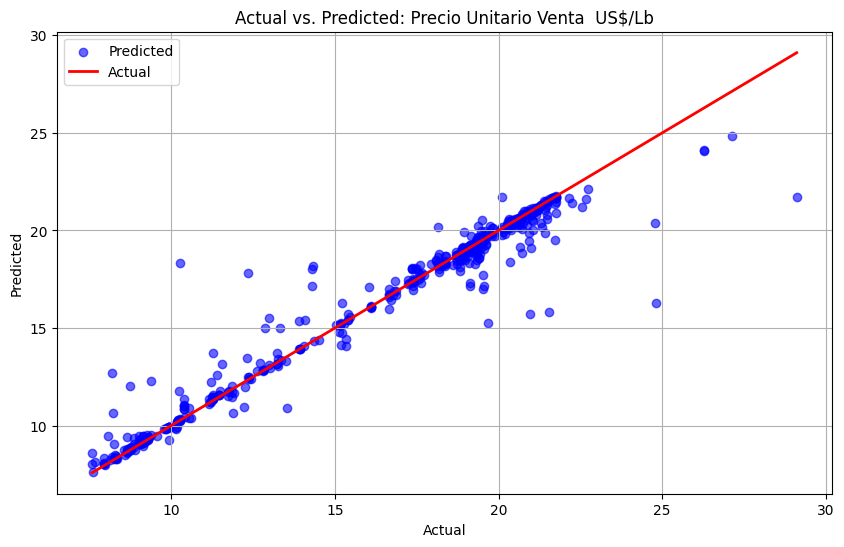

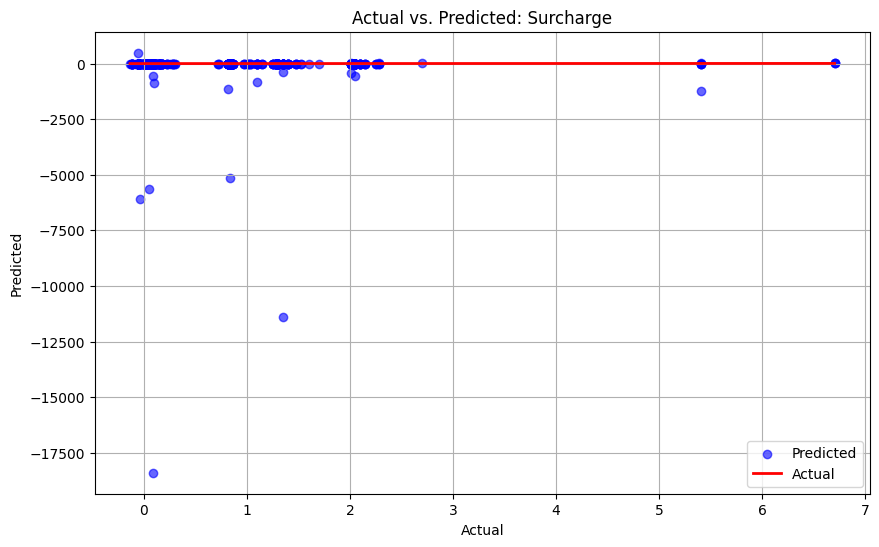

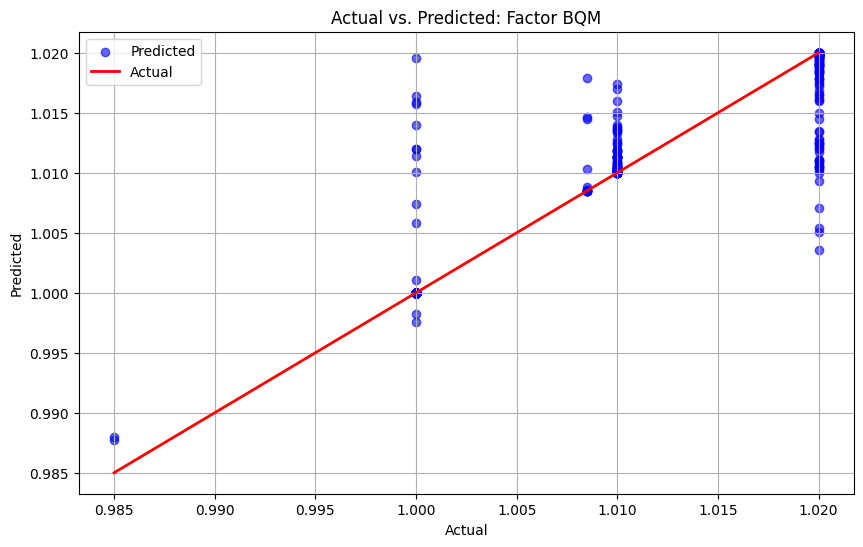

In [19]:
import matplotlib.pyplot as plt

models = {}
results = {}

for target in targets:
    y = contrato_regular_df[[target]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train.values.ravel())
    
    y_pred = model.predict(X_test)
    
    # Unscale the predictions and the test target values
    y_pred_unscaled = scalers_targets[target].inverse_transform(y_pred.reshape(-1, 1))
    y_test_unscaled = scalers_targets[target].inverse_transform(y_test)
    
    rmse = mean_squared_error(y_test_unscaled, y_pred_unscaled)
    r2 = r2_score(y_test_unscaled, y_pred_unscaled)
    mae = mean_absolute_error(y_test_unscaled, y_pred_unscaled)
    
    models[target] = model
    
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test_unscaled, y_pred_unscaled, color='blue', label='Predicted', alpha=0.6)
    plt.plot([y_test_unscaled.min(), y_test_unscaled.max()],
            [y_test_unscaled.min(), y_test_unscaled.max()], color='red', lw=2, label='Actual')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs. Predicted: ' + target)
    plt.legend()
    plt.grid(True)
    plt.show()
    results[target] = {'MAE':mae, 'RMSE': rmse, 'R²': r2}

In [ ]:
# Display the evaluation metrics for each model
print("Model Evaluation Metrics:")
for target, metrics in results.items():
    print(f"- MAE: {metrics['MAE']}, RMSE: {metrics['RMSE']}, R²: {metrics['R²']}")

In [37]:
def predict_sales_price(N_Material, Lbmo_material, Total_Factura, Costo_Total, margen_venta, models=models, scalers_targets=scalers_targets, scaler_features=scaler):
    
    if N_Material not in [2020, 2000, 2010]:
        raise ValueError("Error: The chosen 'Nº Material' is not recognized by the model.")
    
    # Scale the features using the fitted scaler
    features_to_scale = np.array([Lbmo_material, Total_Factura, Costo_Total, margen_venta]).reshape(1,-1)
    scaled_features = scaler_features.transform(features_to_scale)
    features = np.hstack([[N_Material], scaled_features[0]]).reshape(1,-1)
    # print(features)
    
    # Predict each component and unscale the predictions
    predictions = {}
    for target in targets:
        pred_scaled = models[target].predict(features)
        pred_unscaled = scalers_targets[target].inverse_transform(pred_scaled.reshape(-1, 1))[0, 0]
        predictions[target] = pred_unscaled
    
    # Calculate the sales price
    sales_price = (predictions['Precio Unitario Venta  US$/Lb'] * predictions['Factor BQM']) + predictions['Surcharge']
    print('Precio:', predictions['Precio Unitario Venta  US$/Lb'])
    print('Factor BQM:', predictions['Factor BQM'])
    print('Surcharge:', predictions['Surcharge'])
    return sales_price

In [39]:
import numpy as np

sales_price = predict_sales_price(2020, 16000.019, 168800, 150869.47, 17930.53)

Precio: 10.1489
Factor BQM: 1.0
Surcharge: 0.06445000001084512


f:\Hassan\sales_price\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
f:\Hassan\sales_price\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
f:\Hassan\sales_price\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
f:\Hassan\sales_price\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [41]:
print(sales_price)

10.213350000010845


In [42]:
# Save the models and fitted scalers in a pickle file


regular_model_and_scaler = {'models': models,
                            'scaler_target': scalers_targets,
                            'scaler_features': scaler}

with open('Regular_models_and_scalers.pkl', 'wb') as file:
    pickle.dump(regular_model_and_scaler, file)